##  Item-based Collaborative filtering - Books Recommendation System
### Shruti Patil 




 # Abstract 

    In this project, we proposed a Item-Based collaborative-filtering "Books Recommendation System" using the Kaggle dataset. The goal of this recommendation project is to provide the top 5 books which are similar to the particular book using Item-Based CF, KNNBasics, and SVD. Measure of the Similarity used in this project are Cosine similarity, Manhattan distances, and Euclidean distances. Further, to evaluate the models used in this project are RMSE and MAE. 
    The project involves several stages including data preprocessing, feature extraction, similarity calculation, recommendation generation, and performance evaluation. Python programming language, Jupyter Notebook, and relevant libraries such as pandas, numpy, surprise and scikit-learn are utilized for implementing the recommendation system.
    

### Goal of the project

The goal of the project is to develop a collaborative recommendation system by merging these datasets. The project aims to create a system that can recommend books to users based on the items themselves. 
By analyzing the features such as Book-Title, Book-Author, Book-Rating, and other features available in the book dataset : 
 - Recommend books to the specific user
 - Recommend books based on similarity measures.

The key objectives of the project include:

<b>Data Exploration:</b> Conduct an in-depth analysis of the book dataset to understand its structure, features, and relationships between different attributes.

<b>Feature Extraction:</b> Extract relevant information from the dataset, including Age, Book-Title, Location, user-ratings, and Year-of-publication, to build a comprehensive representation of books.

<b>Algorithms</b> In this project, we have used KNNbasic and SVD for recommending the items. For KNNbasic - Basic KNN, Pearson Correlation, Pearson-Baseline Correlation these parameters are used.

<b>Similarity Calculation:</b> We implemented an Item-User matrix to calculate similarities to find the similar books. Similarity measures such as cosine similarities, Manhattan and euclidean distances are used.

<b>Recommendation Generation:</b> Implement the recommendation algorithm that utilizes the Item-based CF approach to generate personalized recommendations for users and find similar books. The system will consider the user's profile and the similarity between items to suggest relevant books that match their interests.

<b>Evaluation:</b> Different evaluation metrics are used such as - Root Mean Square Error(RMSE) and Mean Absolute Error(MAE)



# Introduction about the data

We chose this book dataset: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data

Dataset
We took the dataset from the Kaggle which consists of the 3 files. 
    1. Users - User-ID, Location, Age
    2. Books - ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L
    3. Ratings - User-ID, ISBN, Book-Rat803X4

# Data Pipeline

The Data Pipeline Involves :

<b>Data Loading:</b>  We loaded the files and converted them to pandas dataframe. <br> 
    -User dataset - 278858 rows<br>
    -Ratings - 1149780 rows<br>
    -Books - 271360 rows

<b>Data Cleaning:</b> A lot of missing values in the Age column (40%), have been changed to the median value because of the data was skewed. 
column name - Year-of-publication column datatype has been changed to the int type. The Location column have changed to the city and country columns. 2 columns have been removed from dataframe Image-URL-M, Image-URL-L. 

<b>Data Exploration and Visualization:</b> For visualization we used plotly library for getting insights about the features using histogram, pie chart and bar chart

<b>Building Recommendation System:</b> KNNbasic and SVD.

In [467]:
import numpy as np
import pandas as pd 

In [468]:
UsersFile = pd.read_csv("Users.csv")
RatingsFile = pd.read_csv("Ratings.csv")
BooksFile = pd.read_csv("Books.csv")

C:\Users\smmus\AppData\Local\Temp\ipykernel_28108\506181215.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  BooksFile = pd.read_csv("Books.csv")


In [469]:
Users = pd.DataFrame(UsersFile)
Ratings = pd.DataFrame(RatingsFile)
Books = pd.DataFrame(BooksFile)

# Data Cleaning And EDA

In [470]:
Users   

User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]

In [471]:
Ratings

User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]

In [472]:
Books

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bruce Wright                2001   
2               Carlo D'Este                1991   
3           Gina Bari Kolata                1999   
4            E. J. W. Barber                1999   
...                      ...                 ...   
271355        Paula Danziger                1988   
271356            Teri Sloat                1991   
271357      Christine Wicker                2004   
271358                 Plato                1996   
271359   Christopher  Biffle                2000   

                                               Publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                             W. W. Norton &amp; Company   
...                                                  ...   
271355                   Random House Childrens Pub (Mm)   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-L  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.ama

<Axes: >

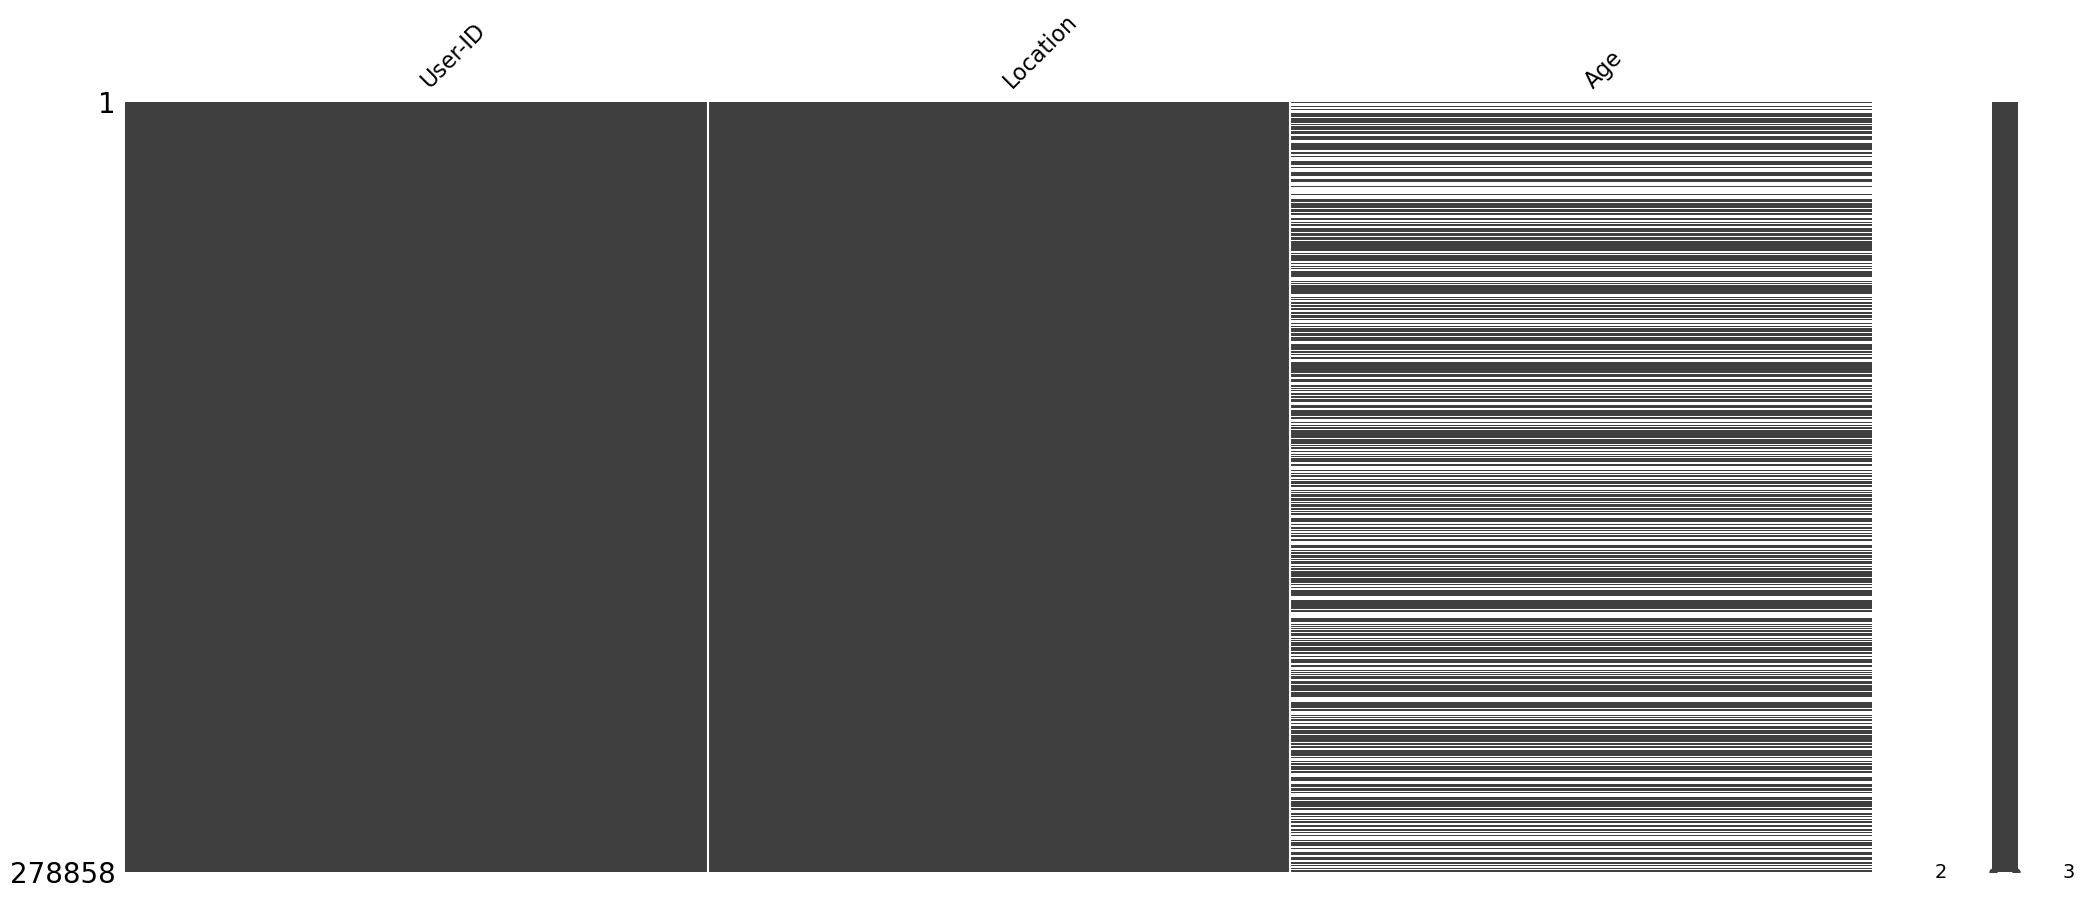

In [473]:
import missingno as msno
msno.matrix(Users)

In [474]:
(110762/278858)* 100 # almost  40% age data is missing

39.71985741847105

(array([4.4314e+04, 9.3316e+04, 2.9212e+04, 8.7500e+02, 3.0100e+02,
        2.8000e+01, 1.5000e+01, 5.0000e+00, 1.8000e+01, 1.2000e+01]),
 array([  0. ,  24.4,  48.8,  73.2,  97.6, 122. , 146.4, 170.8, 195.2,
        219.6, 244. ]),
 <BarContainer object of 10 artists>)

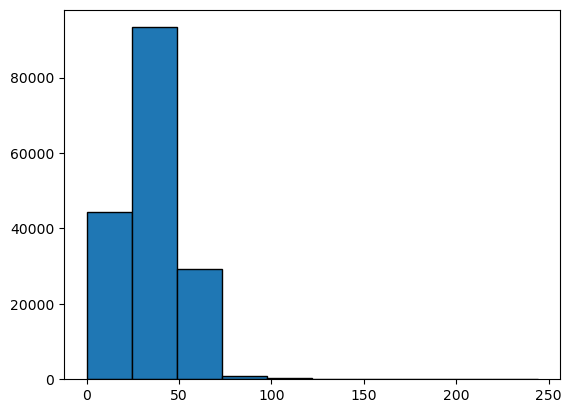

In [475]:
plt.hist(Users['Age'], bins=10, edgecolor='black')

(array([18810., 46246., 40544., 26062., 18108., 11813.,  3906.,   914.,
          110.,    57.]),
 array([11. , 19.8, 28.6, 37.4, 46.2, 55. , 63.8, 72.6, 81.4, 90.2, 99. ]),
 <BarContainer object of 10 artists>)

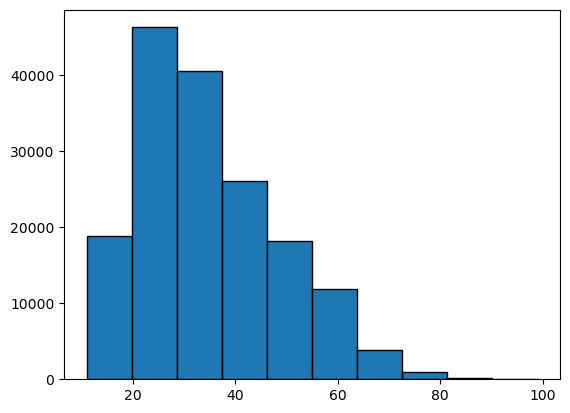

In [476]:
new_age = Users[(Users['Age'] > 10) & (Users["Age"] < 100)]
plt.hist(new_age['Age'], bins=10, edgecolor='black')

In [477]:
Users.loc[(Users.Age > 100) | (Users.Age < 10), 'Age'] = np.nan

#replacing NaNs with median as here mena and median as equal no that difference 
Users.Age = Users.Age.fillna(Users.Age.median())

Users.Age = Users.Age.astype(np.int32)

In [478]:
Users['City'] = Users['Location'].str.split(',').apply(lambda x: x[0]) 
Users['Country'] = Users['Location'].str.split(',').apply(lambda x: x[-1])
Users.drop(columns=['Location'], inplace=True)
Users.head()

User-ID  Age         City          Country
0        1   32          nyc              usa
1        2   18     stockton              usa
2        3   32       moscow           russia
3        4   17        porto         portugal
4        5   32  farnborough   united kingdom

<Axes: >

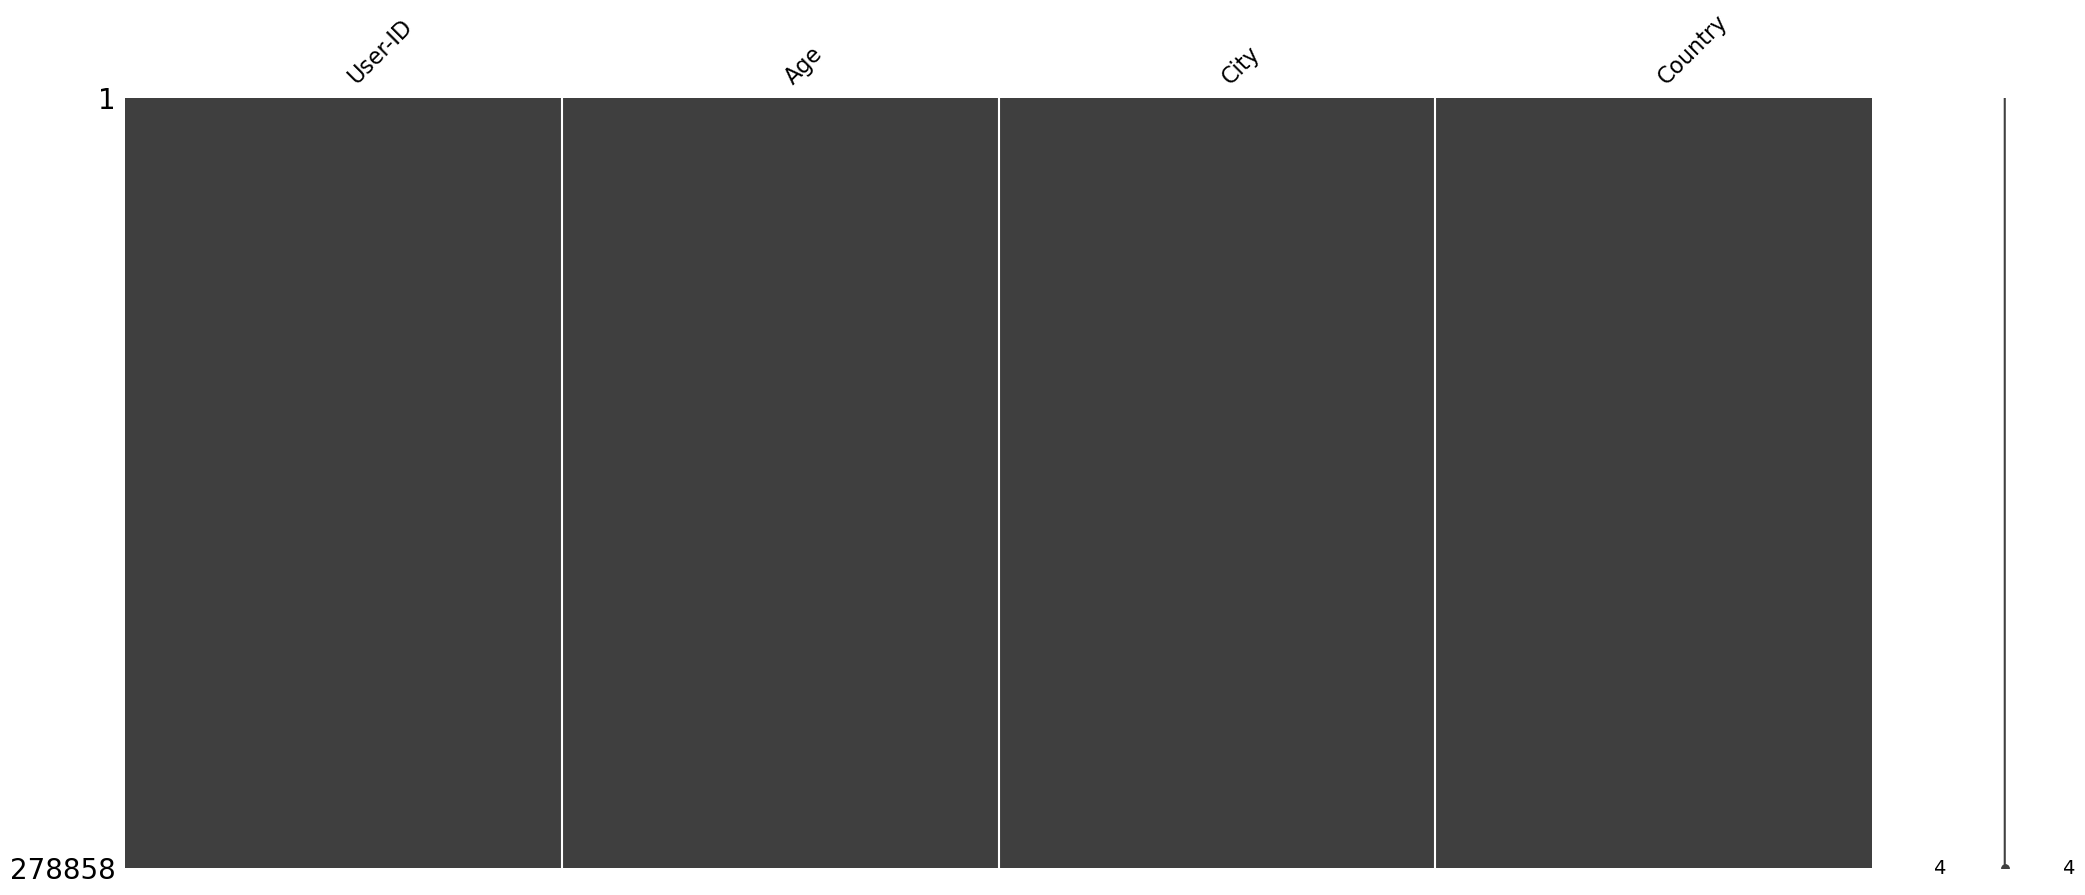

In [479]:
msno.matrix(Users)

In [480]:
Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [481]:
Books.duplicated().sum()

0

In [482]:
Ratings.duplicated().sum()

0

In [483]:
Users.duplicated().sum()

0

In [355]:
print("No of ratings:", len(Ratings.index))

No of ratings: 1149780


In [485]:
pd.to_numeric(Books['Year-Of-Publication'])
Books[Books['Year-Of-Publication']=='DK Publishing Inc']

ValueError: Unable to parse string "DK Publishing Inc" at position 209538

In [487]:
# Update for ISBN '0789466953'
Books.loc[Books.ISBN == '0789466953', 'Year-Of-Publication'] = 2000
Books.loc[Books.ISBN == '0789466953', 'Book-Author'] = "James Buckley"
Books.loc[Books.ISBN == '0789466953', 'Publisher'] = "DK Publishing Inc"
Books.loc[Books.ISBN == '0789466953', 'Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

# Update for ISBN '078946697X'
Books.loc[Books.ISBN == '078946697X', 'Year-Of-Publication'] = 2000
Books.loc[Books.ISBN == '078946697X', 'Book-Author'] = "Michael Teitelbaum"
Books.loc[Books.ISBN == '078946697X', 'Publisher'] = "DK Publishing Inc"
Books.loc[Books.ISBN == '078946697X', 'Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
Books.loc[(Books.ISBN == '0789466953') | (Books.ISBN == '078946697X'),:]

ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

               Book-Author Year-Of-Publication          Publisher  \
209538  Michael Teitelbaum                2000  DK Publishing Inc   
221678       James Buckley                2000  DK Publishing Inc   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-M Image-URL-L  
209538  http://images.amazon.com/images/P/078946697X.0...         NaN  
221678  http://images.amazon.com/images/P/0789466953.0...         NaN

In [488]:
Books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [489]:
pd.to_numeric(Books['Year-Of-Publication'])

ValueError: Unable to parse string "Gallimard" at position 220731

In [492]:
Books[Books["Year-Of-Publication"]=="Gallimard"]

ISBN                                         Book-Title  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   

       Book-Author Year-Of-Publication  \
220731        2003           Gallimard   

                                                Publisher  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-S  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-M Image-URL-L  
220731  http://images.amazon.com/images/P/2070426769.0...         NaN

In [516]:
Books.loc[Books.ISBN == '2070426769','Year-Of-Publication'] = 2003
Books.loc[Books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
Books.loc[Books.ISBN == '2070426769','Publisher'] = "Gallimard"
Books.loc[Books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

# Data Visualization

In [517]:
# Create a histogram to show the distribution of ages
fig = px.histogram(Users, x='Age', nbins=30, title='Distribution of the ages',
                   labels={'Age': 'Age', 'count': 'Number of Books'})

# Show the figure
fig.show()


In [518]:
# Group by 'Country' and count users for each country
users_by_country = Users.groupby('Country').size().reset_index(name='Number of Users')

# Sort by 'Number of Users' in descending order and select top 5 countries
top_countries = users_by_country.sort_values(by='Number of Users', ascending=False).head(5)

# Create pie chart for top 5 countries using Plotly Express
fig = px.pie(top_countries, values='Number of Users', names='Country',
             title='Top 5 Countries by Number of Users',
             labels={'Number of Users': 'Number of Users', 'Country': 'Country'})

# Show the figure
fig.show()

In [360]:
Filtered_Books = Books.drop(columns=['Image-URL-M','Image-URL-L'], axis=1)
Filtered_Books

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bruce Wright                2001   
2               Carlo D'Este                1991   
3           Gina Bari Kolata                1999   
4            E. J. W. Barber                1999   
...                      ...                 ...   
271355        Paula Danziger                1988   
271356            Teri Sloat                1991   
271357      Christine Wicker                2004   
271358                 Plato                1996   
271359   Christopher  Biffle                2000   

                                               Publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                             W. W. Norton &amp; Company   
...                                                  ...   
271355                   Random House Childrens Pub (Mm)   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                              Image-URL-S  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.amazon.com/images/P/0393045218.0...  
...                                                   ...  
271355  http://images.amazon.com/images/P/0440400988.0...  
271356  http://images.amazon.com/images/P/0525447644.0...  
271357  http://images.amazon.com/images/P/006008667X.0...  
271358  http://images.amazon.com/images/P/0192126040.0...  
271359  http://images.amazon.com/images/P/0767409752.0...  

[271360 rows x 6 columns]

In [364]:
Merged = pd.merge(Ratings, Filtered_Books, on='ISBN')
Merged

User-ID        ISBN  Book-Rating  \
0         276725  034545104X            0   
1           2313  034545104X            5   
2           6543  034545104X            0   
3           8680  034545104X            5   
4          10314  034545104X            9   
...          ...         ...          ...   
1031131   276688  0517145553            0   
1031132   276688  1575660792            7   
1031133   276690  0590907301            0   
1031134   276704  0679752714            0   
1031135   276704  0806917695            5   

                                                Book-Title      Book-Author  \
0                                     Flesh Tones: A Novel       M. J. Rose   
1                                     Flesh Tones: A Novel       M. J. Rose   
2                                     Flesh Tones: A Novel       M. J. Rose   
3                                     Flesh Tones: A Novel       M. J. Rose   
4                                     Flesh Tones: A Novel       M. J. Rose   
...                                                    ...              ...   
1031131                                    Mostly Harmless    Douglas Adams   
1031132                                        Gray Matter  Shirley Kennett   
1031133  Triplet Trouble and the Class Trip (Triplet Tr...     Debbie Dadey   
1031134  A Desert of Pure Feeling (Vintage Contemporaries)   Judith Freeman   
1031135  Perplexing Lateral Thinking Puzzles: Scholasti...      Paul Sloane   

        Year-Of-Publication                          Publisher  \
0                      2002                   Ballantine Books   
1                      2002                   Ballantine Books   
2                      2002                   Ballantine Books   
3                      2002                   Ballantine Books   
4                      2002                   Ballantine Books   
...                     ...                                ...   
1031131                1995             Random House Value Pub   
1031132                1996  Kensington Publishing Corporation   
1031133                1997                              Apple   
1031134                1997                  Vintage Books USA   
1031135                1997                Sterling Publishing   

                                               Image-URL-S  
0        http://images.amazon.com/images/P/034545104X.0...  
1        http://images.amazon.com/images/P/034545104X.0...  
2        http://images.amazon.com/images/P/034545104X.0...  
3        http://images.amazon.com/images/P/034545104X.0...  
4        http://images.amazon.com/images/P/034545104X.0...  
...                                                    ...  
1031131  http://images.amazon.com/images/P/0517145553.0...  
1031132  http://images.amazon.com/images/P/1575660792.0...  
1031133  http://images.amazon.com/images/P/0590907301.0...  
1031134  http://images.amazon.com/images/P/0679752714.0...  
1031135  http://images.amazon.com/images/P/0806917695.0...  

[1031136 rows x 8 columns]

In [551]:
import pandas as pd
import plotly.express as px

# Assuming Merged is your DataFrame containing 'Book-Title' and 'Book-Rating'

# Group by 'Book-Title' and calculate the number of ratings
book_stats = Merged.groupby('Book-Title').agg({
    'Book-Rating': 'count'
}).reset_index()

# Rename the columns for clarity
book_stats.columns = ['Book-Title', 'Number of Ratings']

# Sort by 'Number of Ratings' in descending order
most_popular_books = book_stats.sort_values(by='Number of Ratings', ascending=False)

# Select the top 10 most popular books based on the number of ratings
top_books = most_popular_books.head(10)

# Create the bar chart using Plotly Express
fig = px.bar(top_books, x='Book-Title', y='Number of Ratings',
             title='Top 10 Books with Highest Number of Ratings',
             labels={'Book-Title': 'Book Title', 'Number of Ratings': 'Number of Ratings'},
             color='Number of Ratings', color_continuous_scale='Viridis')

# Update layout for better visualization
fig.update_layout(xaxis_tickangle=-45)

# Show the figure
fig.show()


In [530]:
X = Merged.groupby('User-ID').count()['Book-Rating'] > 200
Ratings_Num = Merged[Merged['User-ID'].isin(X[X].index)]
Ratings_Num

User-ID        ISBN  Book-Rating  \
2           6543  034545104X            0   
5          23768  034545104X            0   
7          28523  034545104X            0   
15         77940  034545104X            0   
16         81977  034545104X            0   
...          ...         ...          ...   
1030883   275970  1880837927            0   
1030884   275970  188717897X            0   
1030885   275970  1888889047            0   
1030886   275970  1931868123            0   
1030887   275970  3411086211           10   

                                                Book-Title  \
2                                     Flesh Tones: A Novel   
5                                     Flesh Tones: A Novel   
7                                     Flesh Tones: A Novel   
15                                    Flesh Tones: A Novel   
16                                    Flesh Tones: A Novel   
...                                                    ...   
1030883                         The Theology of the Hammer   
1030884  The Ordeal of Integration: Progress and Resent...   
1030885  Pushcart's Complete Rotten Reviews &amp; Rejec...   
1030886  There's a Porcupine in My Outhouse: Misadventu...   
1030887                                         Die Biene.   

                           Book-Author Year-Of-Publication  \
2                           M. J. Rose                2002   
5                           M. J. Rose                2002   
7                           M. J. Rose                2002   
15                          M. J. Rose                2002   
16                          M. J. Rose                2002   
...                                ...                 ...   
1030883                 Millard Fuller                1994   
1030884              Orlando Patterson                1998   
1030885                 Bill Henderson                1998   
1030886                   Mike Tougias                2002   
1030887  Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt                1993   

                                    Publisher  \
2                            Ballantine Books   
5                            Ballantine Books   
7                            Ballantine Books   
15                           Ballantine Books   
16                           Ballantine Books   
...                                       ...   
1030883         Smyth &amp; Helwys Publishing   
1030884                Civitas Book Publisher   
1030885                        Pushcart Press   
1030886                    Capital Books (VA)   
1030887  Bibliographisches Institut, Mannheim   

                                               Image-URL-S  
2        http://images.amazon.com/images/P/034545104X.0...  
5        http://images.amazon.com/images/P/034545104X.0...  
7        http://images.amazon.com/images/P/034545104X.0...  
15       http://images.amazon.com/images/P/034545104X.0...  
16       http://images.amazon.com/images/P/034545104X.0...  
...                                                    ...  
1030883  http://images.amazon.com/images/P/1880837927.0...  
1030884  http://images.amazon.com/images/P/188717897X.0...  
1030885  http://images.amazon.com/images/P/1888889047.0...  
1030886  http://images.amazon.com/images/P/1931868123.0...  
1030887  http://images.amazon.com/images/P/3411086211.0...  

[474007 rows x 8 columns]

In [552]:
Y = Ratings_Num.groupby('Book-Title').count()['Book-Rating'] >= 50
Ratings_Num = Ratings_Num[Ratings_Num['Book-Title'].isin(Y[Y].index)]
Filtered_Ratings = Ratings_Num.copy()
Filtered_Ratings

User-ID        ISBN  Book-Rating              Book-Title  \
63        278418  0446520802            0            The Notebook   
65          3363  0446520802            0            The Notebook   
66          7158  0446520802           10            The Notebook   
69         11676  0446520802           10            The Notebook   
74         23768  0446520802            6            The Notebook   
...          ...         ...          ...                     ...   
1026724   266865  0531001725           10  The Catcher in the Rye   
1027923   269566  0670809381            0                  Echoes   
1028777   271284  0440910927            0           The Rainmaker   
1029070   271705  B0001PIOX4            0          Fahrenheit 451   
1030868   275970  1586210661            9  Me Talk Pretty One Day   

                   Book-Author Year-Of-Publication                Publisher  \
63             Nicholas Sparks                1996             Warner Books   
65             Nicholas Sparks                1996             Warner Books   
66             Nicholas Sparks                1996             Warner Books   
69             Nicholas Sparks                1996             Warner Books   
74             Nicholas Sparks                1996             Warner Books   
...                        ...                 ...                      ...   
1026724  Jerome David Salinger                1973   Scholastic Library Pub   
1027923           Maeve Binchy                1986              Penguin USA   
1028777           John Grisham                1995                   Island   
1029070           Ray Bradbury                1993     Simon &amp; Schuster   
1030868          David Sedaris                2001  Time Warner Audio Major   

                                               Image-URL-S  
63       http://images.amazon.com/images/P/0446520802.0...  
65       http://images.amazon.com/images/P/0446520802.0...  
66       http://images.amazon.com/images/P/0446520802.0...  
69       http://images.amazon.com/images/P/0446520802.0...  
74       http://images.amazon.com/images/P/0446520802.0...  
...                                                    ...  
1026724  http://images.amazon.com/images/P/0531001725.0...  
1027923  http://images.amazon.com/images/P/0670809381.0...  
1028777  http://images.amazon.com/images/P/0440910927.0...  
1029070  http://images.amazon.com/images/P/B0001PIOX4.0...  
1030868  http://images.amazon.com/images/P/1586210661.0...  

[58586 rows x 8 columns]

# Item Based CF

In [561]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic, accuracy

# Define a Reader object with the rating scale
reader = Reader(rating_scale=(0, 10))


# Load data from DataFrame
data = Dataset.load_from_df(Filtered_Ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)

# Perform train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Define the KNNBasic algorithm 
sim_options = {
    'name': 'pearson_baseline',  
    'user_based': False  # Item-based CF
}

algo_knn_pearson_baseline = KNNBasic(sim_options=sim_options)

# Train the algorithm on the training set
algo_knn_pearson_baseline.fit(trainset)

# Predict ratings for the test set
pearson_baseline = algo_knn_pearson_baseline.test(testset)

# Calculate RMSE
rmse_pearson_baseline = accuracy.rmse(pearson_baseline)

# Calculate MAE
mae_pearson_baseline = accuracy.mae(pearson_baseline)


print(f'Collaborative Filtering (Basic KNN with Pearson_Baseline) RMSE: {rmse_pearson_baseline}')
print(f'Collaborative Filtering (Basic KNN with Pearson_Baseline) MAE: {mae_pearson_baseline}')

# Perform cross-validation
results = cross_validate(algo_knn_pearson_baseline, data, measures=['RMSE', 'MAE'], cv=7, verbose=True)

# Extract and print the average RMSE and MAE
print("Cross-validation results (5-fold):")
for metric in ['test_rmse', 'test_mae']:
    print(f"{metric}: {results[metric].mean()}")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 3.3263
MAE:  2.4272
Collaborative Filtering (Basic KNN with Pearson_Baseline) RMSE: 3.326296676553816
Collaborative Filtering (Basic KNN with Pearson_Baseline) MAE: 2.427174989264952
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity 

In [562]:
from surprise import Dataset, Reader

# Define a Reader object with the rating scale
reader = Reader(rating_scale=(0, 10))

# Load data from DataFrame
data = Dataset.load_from_df(Filtered_Ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)
from surprise.model_selection import train_test_split

# Perform train-test split
trainset, testset = train_test_split(data, test_size=0.2)
from surprise import KNNBasic, accuracy

# Define the KNNBasic algorithm
algo_knn_KNNBasic = KNNBasic(sim_options={'user_based': False})

# Train the algorithm on the training set
algo_knn_KNNBasic.fit(trainset)

# Predict ratings for the test set
predictions_knn = algo_knn_KNNBasic.test(testset)

# Calculate RMSE
rmse_knn = accuracy.rmse(predictions_knn)
# Calculate MAE
mae_knn = accuracy.mae(predictions_knn)
print(f'Collaborative Filtering (Basic KNN) RMSE: {rmse_knn}')
print(f'Collaborative Filtering (Basic KNN) MAE: {mae_knn}')

# Perform cross-validation
results = cross_validate(algo_knn_KNNBasic, data, measures=['RMSE', 'MAE'], cv=7, verbose=True)

# Extract and print the average RMSE and MAE
print("Cross-validation results (5-fold):")
for metric in ['test_rmse', 'test_mae']:
    print(f"{metric}: {results[metric].mean()}")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.4047
MAE:  2.4514
Collaborative Filtering (Basic KNN) RMSE: 3.4047416998938127
Collaborative Filtering (Basic KNN) MAE: 2.4514473547439692
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 7 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Mean    Std     
RMSE (testset)    3.3412  3.3453  3.4037  3.3801  3.3968  3.3674  3.3594  3.3706  0.0224  
MAE (testset)     2.4022  2.

In [563]:
from surprise import Dataset, Reader

# Define a Reader object with the rating scale
reader = Reader(rating_scale=(0, 10))

# Load data from DataFrame
data = Dataset.load_from_df(Filtered_Ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)
from surprise.model_selection import train_test_split

# Perform train-test split
trainset, testset = train_test_split(data, test_size=0.2)
from surprise import KNNBasic, accuracy

# Define the KNNBasic algorithm with Pearson correlation
algo_pearson = KNNBasic(sim_options={'name': 'pearson', 'user_based': False})

# Train the algorithm on the training set
algo_pearson.fit(trainset)

# Predict ratings for the test set
predictions_pearson = algo_pearson.test(testset)

# Calculate RMSE
rmse_pearson = accuracy.rmse(predictions_pearson)
# Calculate MAE
mae_pearson = accuracy.mae(predictions_pearson)

print(f'Collaborative Filtering (Pearson Correlation) RMSE: {rmse_pearson}')
print(f'Collaborative Filtering (Pearson Correlation) MAE: {mae_pearson}')

# Perform cross-validation
results = cross_validate(algo_pearson, data, measures=['RMSE', 'MAE'], cv=7, verbose=True)

# Extract and print the average RMSE and MAE
print("Cross-validation results (5-fold):")
for metric in ['test_rmse', 'test_mae']:
    print(f"{metric}: {results[metric].mean()}")


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.3629
MAE:  2.4577
Collaborative Filtering (Pearson Correlation) RMSE: 3.36293225620146
Collaborative Filtering (Pearson Correlation) MAE: 2.4577255224671406
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 7 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Mean    Std     
RMSE (testset)    3.3430  3.3240  3.3547  3.3510  3.3468  3.3940  3.3

In [564]:
# Print RMSE for each method
print(f' Collaborative Filtering (Basic KNN) RMSE: {rmse_knn}')
print(f' Collaborative Filtering (Pearson Correlation) RMSE: {rmse_pearson}')
print(f' Collaborative Filtering (Pearson-Baseline Correlation) RMSE: {rmse_pearson_baseline}')

 Collaborative Filtering (Basic KNN) RMSE: 3.4047416998938127
 Collaborative Filtering (Pearson Correlation) RMSE: 3.36293225620146
 Collaborative Filtering (Pearson-Baseline Correlation) RMSE: 3.326296676553816


In [583]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split, cross_validate


# Define a Reader object with the rating scale
reader = Reader(rating_scale=(0, 10))

# Load data from DataFrame
data = Dataset.load_from_df(Filtered_Ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)

# Perform train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Define the SVD algorithm
algo_svd = SVD()

# Train the algorithm on the training set
algo_svd.fit(trainset)

# Predict ratings for the test set
svd_predictions = algo_svd.test(testset)

# Calculate RMSE
rmse_svd = accuracy.rmse(svd_predictions)

# Calculate MAE
mae_svd = accuracy.mae(svd_predictions)

print(f'Collaborative Filtering (SVD) RMSE: {rmse_svd}')
print(f'Collaborative Filtering (SVD) MAE: {mae_svd}')


# Function to recommend books for a specific user
def get_svd_recommendations(algo, user_id, n_recommendations=10):
    # Get a list of all item IDs (ISBNs)
    all_items = set(Filtered_Ratings['Book-Title'])
    # Get a list of items the user has already rated
    rated_items = set(Filtered_Ratings[Filtered_Ratings['User-ID'] == user_id]['Book-Title'])
    # Get a list of items the user has not rated
    unrated_items = all_items - rated_items
    
    # Predict ratings for all unrated items
    predictions = [algo.predict(user_id, item_id) for item_id in unrated_items]
    # Sort predictions by estimated rating in descending order
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)
    # Get the top n recommendations
    top_predictions = sorted_predictions[:n_recommendations]
    
    # Extract the ISBNs and estimated ratings for the top recommendations
    recommended_items = [(pred.iid, pred.est) for pred in top_predictions]
    # Convert to a DataFrame for better readability
    recommended_df = pd.DataFrame(recommended_items, columns=['Book-Title', 'Estimated Rating'])
    
    return recommended_df

# Get recommendations for a specific user (example user ID '278418')
user_id = '278418'
recommendations = get_svd_recommendations(algo_svd, user_id, n_recommendations=10)
print(f'Recommendations for User {user_id}:')
print(recommendations)


RMSE: 3.4501
MAE:  2.5477
Collaborative Filtering (SVD) RMSE: 3.4501281558288244
Collaborative Filtering (SVD) MAE: 2.547650517868271
Recommendations for User 278418:
                                          Book-Title  Estimated Rating
0                                       Isle of Dogs          1.978386
1                                      The Dark Half          1.978386
2                                      Hornet's Nest          1.978386
3  Stupid White Men ...and Other Sorry Excuses fo...          1.978386
4  Dying for Chocolate (Culinary Mysteries (Paper...          1.978386
5                                         Night Sins          1.978386
6                                            Killjoy          1.978386
7                              Moonlight Becomes You          1.978386
8                            A Prayer for Owen Meany          1.978386
9                                          Deja Dead          1.978386


In [572]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise import KNNBasic, accuracy
import pandas as pd

# Define a Reader object with the rating scale
reader = Reader(rating_scale=(0, 10))

# Assuming Filtered_Ratings is your DataFrame containing ['User-ID', 'ISBN', 'Book-Rating']

# Load data from DataFrame
data = Dataset.load_from_df(Filtered_Ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)

# Perform train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Define the KNNBasic algorithm with Pearson Baseline similarity
sim_options = {
    'name': 'pearson_baseline',  
    'user_based': False  # Item-based CF
}

# Create KNNBasic algorithm instance with Pearson Baseline similarity
algo_knn_pearson_baseline = KNNBasic(sim_options=sim_options)

# Train the algorithm on the training set
algo_knn_pearson_baseline.fit(trainset)

# Predict ratings for the test set
pearson_baseline = algo_knn_pearson_baseline.test(testset)

# Calculate RMSE
rmse_pearson_baseline = accuracy.rmse(pearson_baseline)

# Calculate MAE
mae_pearson_baseline = accuracy.mae(pearson_baseline)

# Perform cross-validation
results = cross_validate(algo_knn_pearson_baseline, data, measures=['RMSE', 'MAE'], cv=7, verbose=True)


# Function to recommend books for a specific user
def get_recommendations(algo, user_id, n_recommendations=10):
    # Get a list of all item IDs (ISBNs)
    all_items = set(Filtered_Ratings['Book-Title'])
    # Get a list of items the user has already rated
    rated_items = set(Filtered_Ratings[Filtered_Ratings['User-ID'] == user_id]['Book-Title'])
    # Get a list of items the user has not rated
    unrated_items = all_items - rated_items
    
    # Predict ratings for all unrated items
    predictions = [algo.predict(user_id, item_id) for item_id in unrated_items]
    # Sort predictions by estimated rating in descending order
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)
    # Get the top n recommendations
    top_predictions = sorted_predictions[:n_recommendations]
    
    # Extract the ISBNs and estimated ratings for the top recommendations
    recommended_items = [(pred.iid, pred.est) for pred in top_predictions]
    # Convert to a DataFrame for better readability
    recommended_df = pd.DataFrame(recommended_items, columns=['Book-Title', 'Estimated Rating'])
    
    return recommended_df

# Get recommendations for a specific user (example user ID '12345')
user_id = '278418'
recommendations = get_recommendations(algo_knn_pearson_baseline, user_id, n_recommendations=10)
print(f'Recommendations for User {user_id}:')
print(recommendations)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 3.2818
MAE:  2.3938
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNB

In [576]:
Item_User_Matrix = Filtered_Ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating').fillna(0)
Item_User_Matrix

User-ID                                             254     2276    2766    \
Book-Title                                                                   
1984                                                   9.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0    10.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     7.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             2977    3363    4017    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             4385    6251    6323    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             6543    ...  271705  \
Book-Title                                                  ...           
1984                                                   0.0  ...    10.0   
1st to Die: A Novel                                    9.0  ...     0.0   
2nd Chance                                             0.0  ...     0.0   
4 Blondes                                              0.0  ...     0.0   
A Bend in the Road                                     0.0  ...     0.0   
...                                                    ...  ...     ...   
Year of Wonders                                        0.0  ...     0.0   
You Belong To Me                                       0.0  ...     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0   
Zoya                                                   0.0  ...     0.0   
\O\" Is for Outlaw"                                    

# Measure of Similarity

In [577]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(Item_User_Matrix.values)

# Convert the similarity matrix to a DataFrame for easy handling
cosine_sim_df = pd.DataFrame(cosine_sim, index=Item_User_Matrix.index, columns=Item_User_Matrix.index)

def get_similar_books(book_title, num_books=5):
    if book_title not in cosine_sim_df.index:
        print(f"Book '{book_title}' not found in the DataFrame.")
        return []

    # Get the similarity scores for the specified book
    sim_scores = cosine_sim_df[book_title]

    # Sort the books by similarity scores in descending order
    sim_scores = sim_scores.sort_values(ascending=False)

    # Exclude the specified book itself and get the top similar books
    similar_books = sim_scores.iloc[1:num_books+1]
    
    return similar_books

# Example usage:
similar_books = get_similar_books('1984', num_books=5)
print(similar_books)


Book-Title
Animal Farm                                         0.270265
The Handmaid's Tale                                 0.263962
Brave New World                                     0.236694
The Vampire Lestat (Vampire Chronicles, Book II)    0.232994
The Hours : A Novel                                 0.226264
Name: 1984, dtype: float64


In [578]:
import pandas as pd
from sklearn.metrics import pairwise_distances


# Compute the Manhattan distance matrix
manhattan_dist = pairwise_distances(Item_User_Matrix.values, metric='manhattan')

# Convert the distance matrix to a DataFrame for easy handling
manhattan_dist_df = pd.DataFrame(manhattan_dist, index=Item_User_Matrix.index, columns=Item_User_Matrix.index)

def get_similar_books(book_title, num_books=5):
    if book_title not in manhattan_dist_df.index:
        print(f"Book '{book_title}' not found in the DataFrame.")
        return []

    # Get the distance scores for the specified book
    dist_scores = manhattan_dist_df[book_title]

    # Sort the books by distance scores in ascending order (lower distance means more similar)
    dist_scores = dist_scores.sort_values(ascending=True)

    # Exclude the specified book itself and get the top similar books
    similar_books = dist_scores.iloc[1:num_books+1]
    
    return similar_books

similar_books = get_similar_books('1984', num_books=5)
print(similar_books)


Book-Title
No Safe Place          217.333333
A Civil Action         223.166667
Exclusive              228.666667
Foucault's Pendulum    236.666667
Waiting to Exhale      237.666667
Name: 1984, dtype: float64


In [579]:
import pandas as pd
from sklearn.metrics import pairwise_distances

euclidean_dist = pairwise_distances(Item_User_Matrix.values, metric='euclidean')

# Convert the distance matrix to a DataFrame for easy handling
euclidean_dist_df = pd.DataFrame(euclidean_dist, index=Item_User_Matrix.index, columns=Item_User_Matrix.index)

def get_similar_books(book_title, num_books=5):
    if book_title not in euclidean_dist_df.index:
        print(f"Book '{book_title}' not found in the DataFrame.")
        return []

    # Get the distance scores for the specified book
    dist_scores = euclidean_dist_df[book_title]

    # Sort the books by distance scores in ascending order (lower distance means more similar)
    dist_scores = dist_scores.sort_values(ascending=True)

    # Exclude the specified book itself and get the top similar books
    similar_books = dist_scores.iloc[1:num_books+1]
    
    return similar_books


similar_books = get_similar_books('1984', num_books=5)
print(similar_books)



Book-Title
No Safe Place          43.047777
A Civil Action         43.875138
Foucault's Pendulum    44.449722
Exclusive              44.636806
Waiting to Exhale      45.049356
Name: 1984, dtype: float64


# Manual Comparison the overall performance of the methods
After comparing the performanceof KNNbasic and SVDr we found out that the Pearson-baseline gives us the least RMSE, MAE. But, the result of SVD and KNNBasic were similar. Out of  Cosine similarity, Eucliidean,and  Manhattan,weI found that cosine works the bestbecauseiteme It is predicting more accrarte values than other two methods for this specificitem- basedCF  recommendation system.r

In conclusion, the choice of similarity measure depends on the nature of the data and the specific requirements of tCFent-based recommendation system. Cosine similarity is commonly used for text-based recommendations, while Euclidean distance and Manhattan distance are more suitable for numerical and categorical features, respectivelem.

# key findings and Conclusion.

RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) are common metrics used to evaluate the performance of collaborative filtering algorithms. Lower values indicate better predictive accuracy. Here in this project that was around 30% error.
Cross-validation provides a more robust evaluation by training and testing the model on different subsets of the data

In the End among different similarity methods, Cosine Similarity is found to be the most effective method while Recommending books.

